We will use two python packages called "pomegranate" and "pgmpy" to build Bayesian Networks. 

Python 2.7, pomegranate 0.7.3, pgmpy 0.1.6, networkx 1.8.1 and other dependencises from Anaconda 2 are used. 

### 1. Given network structure and conditional probabilities

In [2]:
from pomegranate import *

"pomegranate" is a python package that implements fast and flexible probabilistic models ranging from individual probability distributions to compositional models such as Bayesian networks and Hidden Markov Models: https://pomegranate.readthedocs.io/en/latest/BayesianNetwork.html

The first example shown in this exercise shows us how to create an "Asia" Bayesian Network. A description of the network can be found here: http://www.norsys.com/tutorials/netica/secA/tut_A1.htm

This network could be used to diagnose patients arriving at a clinic. Each node in the network corresponds to some condition of the patient. For example, "Visit to Asia" indicates whether the patient recently visited Asia. The arrows between any two nodes indicate that there are probability relationships that are known to exist between them.

Smoking can increase the chances of getting lung cancer and of getting bronchitis. Both lung cancer and bronchitis increase the chances of getting dyspnea (shortness of breath). Both lung cancer and tuberculosis, but not usually bronchitis, can cause an abnormal lung x-ray. 

![title](img/asia.png)

If we take a chest x-ray and the x-ray is abnormal, then the chances of the patient having TB or lung-cancer rise. If we further learn that our patient visited Asia, then the chances that they have tuberculosis would rise further, and of lung-cancer would drop (since the X-ray is now better explained by the presence of TB).


Let's create the distributions starting with Asia and conditional probability for tuberculosis.

In [3]:
asia = DiscreteDistribution( { 'True' : 0.5, 'False' : 0.5 } )

tuberculosis = ConditionalProbabilityTable(
    [[ 'True', 'True', 0.2 ],
     [ 'True', 'False', 0.8 ],
     [ 'False', 'True', 0.01 ],
     [ 'False', 'False', 0.99 ]], [asia])

#The second probability is 0.8. What does it mean?
#It means: probability of Tuberculosis being False given that asia is True (visited asia)

Then the distribution for smoking along with the conditional probability of lung cancer and bronchitis:

In [4]:
smoking = DiscreteDistribution( { 'True' : 0.5, 'False' : 0.5 } )

lung = ConditionalProbabilityTable(
    [[ 'True', 'True', 0.75 ],
     [ 'True', 'False', 0.25 ],
     [ 'False', 'True', 0.02 ],
     [ 'False', 'False', 0.98 ]], [smoking] )

bronchitis = ConditionalProbabilityTable(
    [[ 'True', 'True', 0.92 ],
     [ 'True', 'False', 0.08 ],
     [ 'False', 'True', 0.03 ],
     [ 'False', 'False', 0.97 ]], [smoking] )

tuberculosis_or_cancer = ConditionalProbabilityTable(
    [[ 'True', 'True', 'True', 1.0 ],
     [ 'True', 'True', 'False', 0.0 ],
     [ 'True', 'False', 'True', 1.0 ],
     [ 'True', 'False', 'False', 0.0 ],
     [ 'False', 'True', 'True', 1.0 ],
     [ 'False', 'True', 'False', 0.0 ],
     [ 'False', 'False', 'True', 0.0 ],
     [ 'False', 'False', 'False', 1.0 ]], [tuberculosis, lung] )

Then the probability of an x-ray, which is dependent on whether one has tuberculosis or cancer:

In [5]:
xray = ConditionalProbabilityTable(
    [[ 'True', 'True', 0.885 ],
     [ 'True', 'False', 0.115 ],
     [ 'False', 'True', 0.04 ],
     [ 'False', 'False', 0.96 ]], [tuberculosis_or_cancer] )

Finally the probability of dyspnea, which is dependent on whether one has bronchitis and tuberculosis or cancer:

In [6]:
dyspnea = ConditionalProbabilityTable(
    [[ 'True', 'True', 'True', 0.96 ],
     [ 'True', 'True', 'False', 0.04 ],
     [ 'True', 'False', 'True', 0.89 ],
     [ 'True', 'False', 'False', 0.11 ],
     [ 'False', 'True', 'True', 0.96 ],
     [ 'False', 'True', 'False', 0.04 ],
     [ 'False', 'False', 'True', 0.89 ],
     [ 'False', 'False', 'False', 0.11 ]], [tuberculosis_or_cancer, bronchitis])

Now let's create the states for our bayesian network.

In [7]:
s0 = State( asia, name="asia" )
s1 = State( tuberculosis, name="tuberculosis" )
s2 = State( smoking, name="smoker" )
s3 = State( lung, name="cancer" )
s4 = State( bronchitis, name="bronchitis" )
s5 = State( tuberculosis_or_cancer, name="TvC" )
s6 = State( xray, name="xray" )
s7 = State( dyspnea, name='dyspnea' )

Finally we will create an instance of BayesianNetwork, then add the states.

In [8]:
network = BayesianNetwork( "asia" )
network.add_nodes(s0, s1, s2, s3, s4, s5, s6, s7)

In [9]:
network.add_edge( s0, s1 )
network.add_edge( s1, s5 )
network.add_edge( s2, s3 )
network.add_edge( s2, s4 )
network.add_edge( s3, s5 )
network.add_edge( s5, s6 )
network.add_edge( s5, s7 )
network.add_edge( s4, s7 )

We finish by baking our network to finalize its structure.

In [10]:
network.bake()

In [12]:
network.edge_count()

8

In [22]:
#network.plot()
#needs pygraphviz installed properly and read/write permissions.

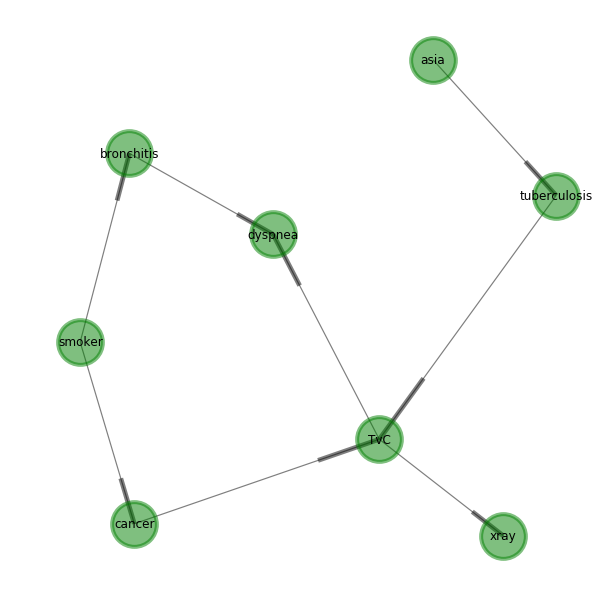

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

DG=nx.DiGraph()

s0 = "asia" 
s1 = "tuberculosis" 
s2 = "smoker" 
s3 = "cancer" 
s4 = "bronchitis" 
s5 = "TvC" 
s6 = "xray" 
s7 = 'dyspnea' 

DG.add_edges_from([( s0, s1 ),( s1, s5 ),( s2, s3 ),( s2, s4 ),( s3, s5 ),( s5, s6 ),( s5, s7 ),( s4, s7 )])

plt.figure(figsize=(8,8)) 
pos = nx.fruchterman_reingold_layout(DG)
nx.draw(DG,node_size=2000,node_color ="green",alpha=0.5,linewidths=4,width=1.2,pos=pos)
plt.show()


Now let's test our network on a person who has tuberculosis, is not a smoker, and has bronchitis:

In [23]:
observations = { 'tuberculosis' : 'True', 'smoker' : 'False', 'bronchitis' : 'True' }

beliefs = map( str, network.predict_proba( observations ) )
print "\n".join( "{}\t\t{}".format( state.name, belief ) for state, belief in zip( network.states, beliefs ) )

asia		{
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "False" :0.04761904761904782,
            "True" :0.9523809523809521
        }
    ],
    "name" :"DiscreteDistribution"
}
tuberculosis		{
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "True" :1.0,
            "False" :0.0
        }
    ],
    "name" :"DiscreteDistribution"
}
smoker		{
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "False" :1.0,
            "True" :0.0
        }
    ],
    "name" :"DiscreteDistribution"
}
cancer		{
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "True" :0.020000000000000438,
            "False" :0.9799999999999995
        }
    ],
    "name" :"DiscreteDistribution"
}
bronchitis		{
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "True" :1.0,
            "False" :0.0
        }
   

### 2. Given network structure, calculate conditional probabilities from data

The data set that we will use here is the Lymphography data (related to breast cancer) from UCI Machine Learning Repository. The data includes 149 instances which are described by the following 19 attributes:

1. class: normal find, metastases, malign lymph, fibrosis
2. lymphatics: normal, arched, deformed, displaced
3. block of affere: no, yes
4. bl. of lymph. c: no, yes
5. bl. of lymph. s: no, yes
6. by pass: no, yes
7. extravasates: no, yes
8. regeneration of: no, yes
9. early uptake in: no, yes
10. lym.nodes dimin: 0-3
11. lym.nodes enlar: 1-4
12. changes in lym.: bean, oval, round
13. defect in node: no, lacunar, lac. marginal, lac. central
14. changes in node: no, lacunar, lac. margin, lac. central
15. changes in stru: no, grainy, drop-like, coarse, diluted, reticular, stripped, faint,
16. special forms: no, chalices, vesicles
17. dislocation of: no, yes
18. exclusion of no: no, yes
19. no. of nodes in: 0-9, 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, >=70 

In [24]:
import pandas as pd

X_train = pd.read_csv('C:\Users\Maziar\Dropbox (ASU)\DropBoxEnteghali2018\ASU School Works\Courses\Teaching internship\IEE520_Exercise3/lymphography.csv', sep=',')

In [25]:
X_train.dropna(inplace=True)

In [26]:
X_train.head()

,Class,lymphatics,block,lymph_c,lymph_s,by_pass,extravasates,regeneration,early,lym_nodes,lym_nodes_enlar,changes,defect_node,changes_in_node,changes_in_stru,special_forms,dislocation,exclusion,no_nodes
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


In [27]:
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator

In [28]:
model = BayesianModel([('Class', 'block'), ('early', 'Class'), ('early', 'lym_nodes'), ('changes', 'Class')])

model.fit(X_train, estimator=BayesianEstimator, prior_type="BDeu") 
#BDeu: Bayesian Dirichlet, e for likelihood-equivalence and u for uniform joint distribution 
for cpd in model.get_cpds():
    print(cpd)

+----------+----------+
| early(1) | 0.303922 |
+----------+----------+
| early(2) | 0.696078 |
+----------+----------+
+--------------+-----------------+-----------------+
| early        | early(1)        | early(2)        |
+--------------+-----------------+-----------------+
| lym_nodes(1) | 0.878136200717  | 0.965571205008  |
+--------------+-----------------+-----------------+
| lym_nodes(2) | 0.0609318996416 | 0.0172143974961 |
+--------------+-----------------+-----------------+
| lym_nodes(3) | 0.0609318996416 | 0.0172143974961 |
+--------------+-----------------+-----------------+
+------------+-----------+
| changes(1) | 0.0501089 |
+------------+-----------+
| changes(2) | 0.514161  |
+------------+-----------+
| changes(3) | 0.43573   |
+------------+-----------+
+----------+-----------------+----------------+------------------+------------------+-----------------+------------------+
| changes  | changes(1)      | changes(1)     | changes(2)       | changes(2)       | chang

### 3. Learn network structure from data

The search space of DAGs is super-exponential in the number of variables. The scoring functions allow for local maxima. Even finding an approximate solution is NP-hard [Dagum and Luby (1993)]. 

#### 3.1. Pomegranate

This package finds the structure of the network from data by optimizing a Bayesian structure learning score (here, minimum description length-MDL). The exact method enumerates all the exponential number of structures and finds the best according to MDL. 



To build the model, we will use BayesianNetwork.from_samples method with the following parameters:

- X: dict or array-like, shape <= n_nodes
			The data/evidence supplied to the graph
- algorithm: [str, one of ‘chow-liu’, ‘greedy’, ‘exact’, ‘exact-dp’ optional] 
            The algorithm to learn the network structure. Default algorithm used is ‘greedy’ that greedily attempts to find the best structure, and frequently can identify the optimal structure. ‘exact’ uses DP/A* to find the optimal Bayesian network. Chow and Liu provide a simple algorithm for constructing the optimal tree; at each stage of the procedure the algorithm simply adds the maximum mutual information pair to the tree. Mutual Information (MI) of two random variables is a measure of the mutual dependence between the two variables.
- state_names:  
            Names of variables (nodes)
           

In [29]:
model = BayesianNetwork.from_samples(X_train, algorithm='chow-liu', state_names=['Class', 'lymphatics' , 'block', 'lymph_c', 'lymph_s', 'by_pass', 'extravasates', 'regeneration','early','lym_nodes', 'lym_nodes_enlar', 'changes','defect_node', 'changes_in_node', 'changes_in_stru','special_forms','dislocation','exclusion', 'no_nodes'])

The method .marginal() also returns the marginal probabilities of each variable in the graph without any evidence provided.

The method predict_proba calculates the marginal probability distributions for each node given
		the evidence provided.

In [31]:
observation = {'lymphatics':1 , 'block':2, 'lymph_c':1, 'lymph_s':1, 'by_pass':2}

beliefs = map( str, model.predict_proba( observation ) )
print "\n".join( "{}\t\t{}".format( state.name, belief ) for state, belief in zip( model.states, beliefs ) )

Class		{
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "1" :0.0,
            "3" :0.11951129453057813,
            "2" :0.8748346529299481,
            "4" :0.0056540525394736
        }
    ],
    "name" :"DiscreteDistribution"
}
lymphatics		{
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "1" :1.0,
            "3" :0.0,
            "2" :0.0,
            "4" :0.0
        }
    ],
    "name" :"DiscreteDistribution"
}
block		{
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "1" :0.0,
            "2" :1.0
        }
    ],
    "name" :"DiscreteDistribution"
}
lymph_c		{
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "1" :1.0,
            "2" :0.0
        }
    ],
    "name" :"DiscreteDistribution"
}
lymph_s		{
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "1" :1.0,
  

In [34]:
model.edge_count()

18

In [35]:
model.node_count()

19

In [37]:
#model.plot()
#needs pygraphviz installed properly and read/write permissions.

We can use additional parameters provided by pomegranate from_samples() method to change the learned network structure:

- pseudocount: [double, optional] 
            This smoothes the states to prevent 0 probability if they
            don’t happen to occur in the data. Default is 0.

- root: [int, optional] 
            For algorithms which require a single root (‘chow-liu’), this is the root
            for which all edges point away from. 
            
- max_parents: [int, optional] 
            The maximum number of parents a node can have. If -1, no
            max on parents.
   

In [38]:
model = BayesianNetwork.from_samples(X_train, algorithm='chow-liu',pseudocount=1, state_names=['Class', 'lymphatics' , 'block', 'lymph_c', 'lymph_s', 'by_pass', 'extravasates', 'regeneration','early','lym_nodes', 'lym_nodes_enlar', 'changes','defect_node', 'changes_in_node', 'changes_in_stru','special_forms','dislocation','exclusion', 'no_nodes'])

In [40]:
model.edge_count()

18

In [41]:
model = BayesianNetwork.from_samples(X_train, algorithm='greedy',max_parents=1, state_names=['Class', 'lymphatics' , 'block', 'lymph_c', 'lymph_s', 'by_pass', 'extravasates', 'regeneration','early','lym_nodes', 'lym_nodes_enlar', 'changes','defect_node', 'changes_in_node', 'changes_in_stru','special_forms','dislocation','exclusion', 'no_nodes'])

In [42]:
model.edge_count()

14

In [43]:
observation = {"dislocation":2}

beliefs = map( str, model.predict_proba( observation ) )
print "\n".join( "{}\t\t{}".format( state.name, belief ) for state, belief in zip( model.states, beliefs ) )

Class		{
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "1" :0.01351351351351415,
            "3" :0.4121621621621617,
            "2" :0.5472972972972965,
            "4" :0.02702702702702763
        }
    ],
    "name" :"DiscreteDistribution"
}
lymphatics		{
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "1" :0.01351351351351373,
            "3" :0.31081081081081074,
            "2" :0.4527027027027025,
            "4" :0.22297297297297297
        }
    ],
    "name" :"DiscreteDistribution"
}
block		{
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "1" :0.44594594594594583,
            "2" :0.5540540540540542
        }
    ],
    "name" :"DiscreteDistribution"
}
lymph_c		{
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "1" :0.8243243243243236,
            "2" :0.1756756756756763
        }
    ],
    "name" :

In [44]:
model = BayesianNetwork.from_samples(X_train, algorithm='greedy',max_parents=2, state_names=['Class', 'lymphatics' , 'block', 'lymph_c', 'lymph_s', 'by_pass', 'extravasates', 'regeneration','early','lym_nodes', 'lym_nodes_enlar', 'changes','defect_node', 'changes_in_node', 'changes_in_stru','special_forms','dislocation','exclusion', 'no_nodes'])

In [45]:
model.edge_count()

16

In [47]:
#WARNING: Might Take too Long to Run
model = BayesianNetwork.from_samples(X_train, algorithm='exact-dp',root=3, state_names=['Class', 'lymphatics' , 'block', 'lymph_c', 'lymph_s', 'by_pass', 'extravasates', 'regeneration','early','lym_nodes', 'lym_nodes_enlar', 'changes','defect_node', 'changes_in_node', 'changes_in_stru','special_forms','dislocation','exclusion', 'no_nodes'])

In [48]:
model.edge_count()

18

#### 3.2. pgmpy

In this package, the structure estimation is based on scores assigned to each structure and the search through the structures is done via exhaustive search or hill climb/tabu search. Bayesian Dirichlet scores such as BDeu or K2 and the Bayesian Information Criterion (BIC) also called Minimum Description Length (MDL) can be used. Network complexity is the number of parameters and how many bits are needed to describe the network, and the data based on the probability distribution of the network, and MDL is to prefer simple BNs over complex ones. 

HillClimbSearch implements a greedy local search (hill climb) that starts from a disconnected DAG and proceeds by iteratively performing single-edge manipulations that maximally increase the score. The search terminates once a local maximum is found.

    Parameters
    ----------
     data: 
        Pandas datafame object where each column represents one variable.

    scoring_method: 
        An instance of `K2Score`, `BdeuScore`, or `BicScore`.
        This score is optimized during structure estimation by the `estimate`-method.
        
    state_names: dict (optional)
        A dict indicating, for each variable, the discrete set of states (or values)
        that the variable can take. If unspecified, the observed values in the data set
        are taken to be the only possible states.

    complete_samples_only: bool (optional, default `True`)
        Specifies how to deal with missing data, if present. If set to `True` all rows
        that contain `np.Nan` somewhere are ignored. If `False` then, for each variable,
        every row where neither the variable nor its parents are `np.NaN` is used.
        This sets the behavior of the `state_count`-method.
        
        
Method .estimate(): Estimates the BayesianModel structure that fits best to the given data set, according to the scoring method supplied in the constructor.

In [50]:
from pgmpy.estimators import BicScore, K2Score, BdeuScore
from pgmpy.estimators import HillClimbSearch

hc = HillClimbSearch(X_train, scoring_method=BicScore(X_train))
best_model = hc.estimate()
print(best_model.edges())

[('changes_in_node', 'defect_node'), ('changes_in_node', 'Class'), ('lymph_c', 'block'), ('lymph_c', 'lymph_s'), ('exclusion', 'dislocation'), ('no_nodes', 'exclusion'), ('lym_nodes_enlar', 'early'), ('lym_nodes_enlar', 'special_forms'), ('lym_nodes_enlar', 'changes'), ('regeneration', 'lym_nodes'), ('block', 'changes_in_node'), ('dislocation', 'lym_nodes_enlar'), ('by_pass', 'extravasates'), ('by_pass', 'regeneration'), ('by_pass', 'lymph_c')]


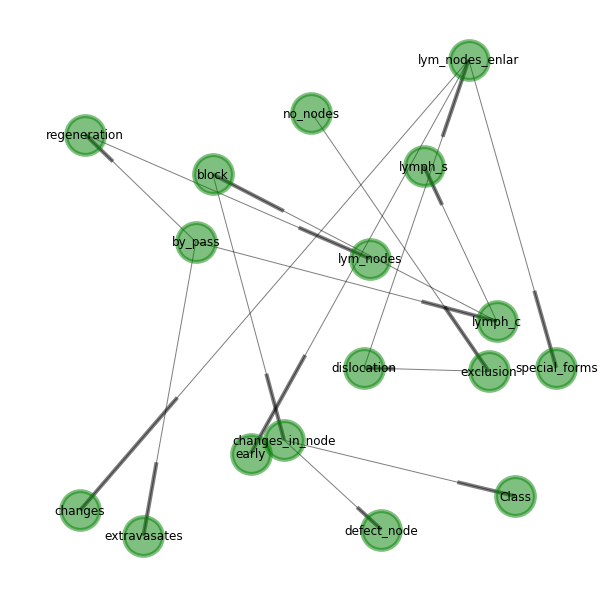

In [54]:
import networkx as nx
import matplotlib.pyplot as plt

DG=nx.DiGraph()
DG.add_edges_from(best_model.edges())

plt.figure(figsize=(8,8)) 
pos = nx.random_layout(DG)
nx.draw(DG,node_size=1500,node_color ="green",alpha=0.5,linewidths=4,width=1,pos=pos)
plt.show()

In [60]:
print "number of edges:", len(best_model.edges())

number of edges: 15


Now, try with K2Score:

Edges: [('changes_in_node', 'defect_node'), ('lymph_c', 'by_pass'), ('lymph_c', 'block'), ('exclusion', 'changes_in_node'), ('exclusion', 'dislocation'), ('no_nodes', 'lym_nodes_enlar'), ('no_nodes', 'exclusion'), ('lym_nodes_enlar', 'early'), ('lym_nodes_enlar', 'special_forms'), ('lym_nodes_enlar', 'dislocation'), ('lym_nodes_enlar', 'changes_in_stru'), ('lym_nodes_enlar', 'changes'), ('Class', 'changes_in_node'), ('Class', 'special_forms'), ('Class', 'no_nodes'), ('Class', 'early'), ('Class', 'lymphatics'), ('Class', 'extravasates'), ('regeneration', 'lym_nodes'), ('regeneration', 'Class'), ('lymph_s', 'by_pass'), ('lymph_s', 'no_nodes'), ('lymph_s', 'regeneration'), ('lymph_s', 'lymph_c'), ('block', 'Class'), ('block', 'extravasates'), ('lym_nodes', 'no_nodes'), ('lym_nodes', 'lym_nodes_enlar'), ('lym_nodes', 'dislocation'), ('lym_nodes', 'changes_in_stru'), ('lym_nodes', 'changes'), ('lym_nodes', 'Class'), ('by_pass', 'regeneration'), ('by_pass', 'extravasates')]
Number of edges: 

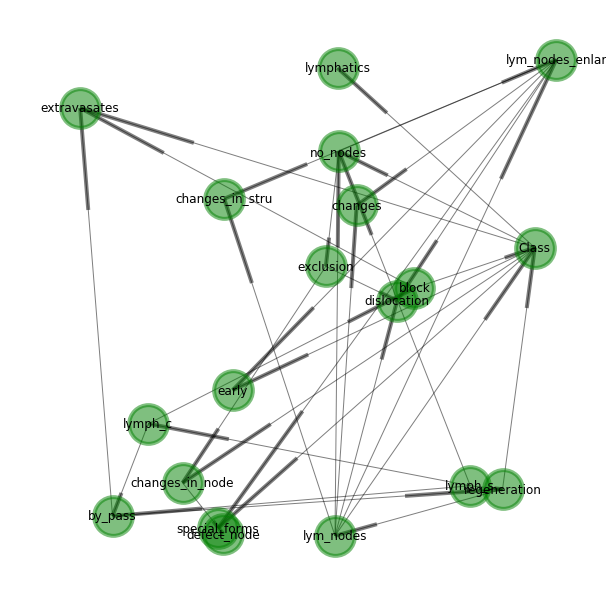

In [61]:
hc = HillClimbSearch(X_train, scoring_method=K2Score(X_train))
best_model = hc.estimate()
print "Edges:", best_model.edges() 
print "Number of edges:", len(best_model.edges())
DG=nx.DiGraph()
DG.add_edges_from(best_model.edges())
plt.figure(figsize=(8,8)) 
pos = nx.random_layout(DG)
nx.draw(DG,node_size=1500,node_color ="green",alpha=0.5,linewidths=4,width=1,pos=pos)
plt.show()

Obtain the conditional probability distribution of nodes:


In [62]:
model = BayesianModel(best_model.edges())

model.fit(X_train, estimator=BayesianEstimator, prior_type="BDeu") 
for cpd in model.get_cpds():
    print(cpd)

+--------------------+-----------------+--------------+------------------+----------------+-----------------+-----------------+-----------------+-----------------+
| Class              | Class(1)        | Class(1)     | Class(2)         | Class(2)       | Class(3)        | Class(3)        | Class(4)        | Class(4)        |
+--------------------+-----------------+--------------+------------------+----------------+-----------------+-----------------+-----------------+-----------------+
| exclusion          | exclusion(1)    | exclusion(2) | exclusion(1)     | exclusion(2)   | exclusion(1)    | exclusion(2)    | exclusion(1)    | exclusion(2)    |
+--------------------+-----------------+--------------+------------------+----------------+-----------------+-----------------+-----------------+-----------------+
| changes_in_node(1) | 0.821428571429  | 0.25         | 0.00690607734807 | 0.019392033543 | 0.0235849056604 | 0.0387640449438 | 0.711538461538  | 0.0431034482759 |
+---------------

Now, try BdeuScore:

Edges: [('changes_in_node', 'defect_node'), ('lymph_c', 'changes_in_node'), ('lymph_c', 'block'), ('lymph_c', 'lymph_s'), ('exclusion', 'dislocation'), ('no_nodes', 'exclusion'), ('lym_nodes_enlar', 'early'), ('lym_nodes_enlar', 'changes_in_stru'), ('lym_nodes_enlar', 'special_forms'), ('Class', 'changes_in_node'), ('Class', 'special_forms'), ('Class', 'no_nodes'), ('Class', 'lym_nodes_enlar'), ('Class', 'regeneration'), ('Class', 'early'), ('Class', 'changes'), ('Class', 'lymphatics'), ('lymph_s', 'lym_nodes'), ('early', 'dislocation'), ('block', 'lym_nodes'), ('block', 'Class'), ('lym_nodes', 'regeneration'), ('lym_nodes', 'Class'), ('lym_nodes', 'exclusion'), ('changes', 'lym_nodes_enlar'), ('by_pass', 'lym_nodes'), ('by_pass', 'lymph_s'), ('by_pass', 'regeneration'), ('by_pass', 'lymph_c'), ('extravasates', 'by_pass'), ('extravasates', 'changes'), ('extravasates', 'Class'), ('extravasates', 'block')]
Number of edges: 33


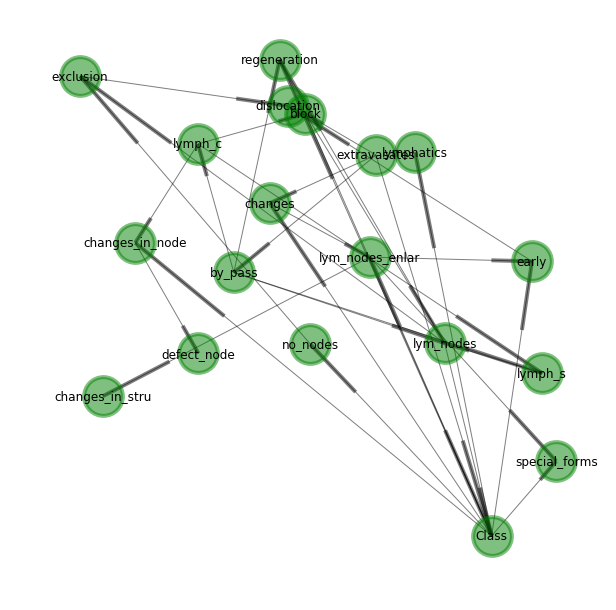

In [65]:
hc = HillClimbSearch(X_train, scoring_method=BdeuScore(X_train))
best_model = hc.estimate()
print "Edges:", best_model.edges() 
print "Number of edges:", len(best_model.edges())
DG=nx.DiGraph()
DG.add_edges_from(best_model.edges())
plt.figure(figsize=(8,8)) 
pos = nx.random_layout(DG)
nx.draw(DG,node_size=1500,node_color ="green",alpha=0.5,linewidths=4,width=1,pos=pos)
plt.show()

Finally, try ExhaustiveSearch: (Computationally expensive, hence try it on a small subset...)

In [ ]:
X_temp=X_train.iloc[:,:5]

from pgmpy.estimators import ExhaustiveSearch

es = ExhaustiveSearch(X_temp, scoring_method=BicScore(X_temp))
best_model = es.estimate()

print "Edges:",best_model.edges()
print "Number of edges:",len(best_model.edges())

DG=nx.DiGraph()
DG.add_edges_from(best_model.edges())
plt.figure(figsize=(8,8)) 
pos = nx.random_layout(DG)
nx.draw(DG,node_size=1500,node_color ="green",alpha=0.5,linewidths=4,width=1,pos=pos)
plt.show()